In [1]:
from graphgps.loader.planetoid import Planetoid

/home/anutkased/dev/Exphormer/exphormer-env/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [15]:
from graphgps.loader.planetoid import Planetoid
dataset = Planetoid("dataset_", "Cora", split='random', train_percent= 0.6)

In [7]:
dataset.data.train_mask.count_nonzero()

tensor(1621)

In [1]:
from ogb.nodeproppred import PygNodePropPredDataset

dataset = PygNodePropPredDataset(name='ogbn-arxiv')

/home/anutkased/dev/Exphormer/exphormer-env/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [9]:
dataset.get_idx_split()['train'].size()

torch.Size([1621])

In [10]:
from graphgps.transform.posenc_stats import get_rw_landing_probs
import time
import tqdm

i_to_time = {}
for i in tqdm.tqdm(range(1, 50)):
    average = 0
    for j in range(3):
        start = time.time()
        rw_landing = get_rw_landing_probs(ksteps=range(0, i),
                                        edge_index=dataset.data.edge_index,
                                        num_nodes=dataset.data.num_nodes)
        end = time.time()
        average += (end - start)

    i_to_time[i] = average / 3



 16%|█▋        | 8/49 [00:15<01:20,  1.96s/it]


KeyboardInterrupt: 

In [2]:
from torch_geometric.graphgym.config import (cfg, dump_cfg,
                                             set_cfg, load_cfg,
                                             makedirs_rm_exist)
from graphgps.config.posenc_config import set_cfg_posenc

set_cfg(cfg)

#add cfg of node2vec
set_cfg_posenc(cfg)
cfg.posenc_Node2Vec.p = 1
cfg.posenc_Node2Vec.q = 1

cfg.posenc_Node2Vec.num_walks = 10
cfg.posenc_Node2Vec.walk_length = 80

cfg.posenc_Node2Vec.window_size = 10
cfg.posenc_Node2Vec.iter = 1

In [ ]:
d

In [3]:
from graphgps.transform.posenc_stats import learn_embeddings
embeddings = learn_embeddings(dataset.data, cfg)

/home/anutkased/dev/Exphormer/exphormer-env/lib/python3.10/site-packages/torch_geometric/data/in_memory_dataset.py:300: UserWarning: It is not recommended to directly access the internal storage format `data` of an 'InMemoryDataset'. If you are absolutely certain what you are doing, access the internal storage via `InMemoryDataset._data` instead to suppress this warning. Alternatively, you can access stacked individual attributes of every graph via `dataset.{attr_name}`.
  warnings.warn(msg)


: 

In [12]:
from graphgps.transform.posenc_stats import learn_embeddings
import time
import tqdm


i_to_time = {}

for i in tqdm.tqdm(range(1, 50)):
    average = 0
    for j in range(3):
        start = time.time()
        embeddings = learn_embeddings(data, cfg)
        end = time.time()

    i_to_time[i] = average / 3

  0%|          | 0/49 [00:00<?, ?it/s]


NameError: name 'data' is not defined

In [13]:
i_to_time

{}

In [14]:
import torch

nodes = torch.tensor(list(range(0, 169343)), dtype=int)

In [ ]:
import numpy as np

In [ ]:
edges.shape

torch.Size([2, 1166243])

In [ ]:
x = np.random.choice(nodes, size=100, replace=False)

In [ ]:
x

array([110211,  68794,  32921, 128027, 152470, 117434,  66854,  92533,
       100872,  58478, 108009, 116833,  22994,  91130,  84021, 139442,
        87051,  18044, 102977,   5932, 149041,  22741,  64481, 156627,
       164359,  38624,   7056,  71373,  20523, 149542, 109290, 152832,
        49220,  38874, 148059, 152440,  30422,  17336,  82806,  71624,
       119486,  41060, 161640,  81700, 107998,  23289, 161037,  37387,
       148826,  61946,  76067, 113303,  97929,  87092, 131164,  91726,
        17981, 147997,  66749, 131437,  68043, 128612, 155500,  47876,
       101390, 116262,  25874, 160828, 145391, 122753,  22198, 102297,
        37668, 125594,  26084,   4266,  26634,  27894, 120642, 135262,
       121768,  41644,  68393,  30522,  83583,  97308,  25149,  53662,
       137938,  66580,  88769, 110767,  70012,  54502,  72370,  25091,
        83059,  40015, 147952,  11819])

In [ ]:
for i in range(edges.shape[1]):
    if edges[0][i] in x and edges[1][i] in x:
        print("here")

In [ ]:
edges = dataset.data.edge_index

/home/anutkased/dev/Exphormer/exphormer-env/lib/python3.10/site-packages/torch_geometric/data/in_memory_dataset.py:300: UserWarning: It is not recommended to directly access the internal storage format `data` of an 'InMemoryDataset'. If you are absolutely certain what you are doing, access the internal storage via `InMemoryDataset._data` instead to suppress this warning. Alternatively, you can access stacked individual attributes of every graph via `dataset.{attr_name}`.
  warnings.warn(msg)


In [ ]:
edges.shape

torch.Size([2, 1166243])

In [ ]:
edges[1, :]

tensor([ 13091,  47283,  69161,  ..., 162473, 162537,  72717])

In [ ]:
degs = []
for i in range(169343):
    deg = edges[1][edges[1, :] == i].shape
    degs.append(deg)

KeyboardInterrupt: 

In [ ]:
max(degs)

torch.Size([13155])

In [ ]:
dataset.data.train_mask

/home/anutkased/dev/Exphormer/exphormer-env/lib/python3.10/site-packages/torch_geometric/data/in_memory_dataset.py:300: UserWarning: It is not recommended to directly access the internal storage format `data` of an 'InMemoryDataset'. If you are absolutely certain what you are doing, access the internal storage via `InMemoryDataset._data` instead to suppress this warning. Alternatively, you can access stacked individual attributes of every graph via `dataset.{attr_name}`.
  warnings.warn(msg)


tensor([ True,  True,  True,  ...,  True,  True, False])

In [17]:
from torch_geometric.graphgym.config import (cfg, dump_cfg,
                                             set_cfg, load_cfg,
                                             makedirs_rm_exist)
from graphgps.config.posenc_config import set_cfg_posenc

set_cfg(cfg)

#add cfg of node2vec
set_cfg_posenc(cfg)
cfg.posenc_Node2Vec.p = 1
cfg.posenc_Node2Vec.q = 1

cfg.posenc_Node2Vec.num_walks = 1
cfg.posenc_Node2Vec.walk_length = 80

cfg.posenc_Node2Vec.window_size = 10
cfg.posenc_Node2Vec.iter = 1


In [18]:
dataset.data.edge_index.shape

torch.Size([2, 10556])

In [19]:
edge_index = torch.tensor([[0, 1], [1, 2], [1, 3], [2, 3]]).reshape(2, -1)

In [20]:
from torch_geometric.nn import Node2Vec
import torch

device = 'cuda' if torch.cuda.is_available() else 'cpu'
model = Node2Vec(
    dataset.data.edge_index,
    embedding_dim=cfg.posenc_Node2Vec.dim_pe,
    walk_length=80,
    context_size=80,
    walks_per_node=10,
    num_negative_samples=0,
    p=cfg.posenc_Node2Vec.p,
    q=cfg.posenc_Node2Vec.q,
    sparse=True,
).to(device)


In [25]:
loader = model.loader(batch_size=128, shuffle=True, num_workers=cfg.num_workers)
# 	optimizer = torch.optim.Adam(list(model.parameters()), lr=0.025)
# 	# scheduler = torch.optim.lr_scheduler.LinearLR(optimizer, start_factor=1.0,  end_factor=0.0001/0.025, total_iters=len(loader))
# 	total_loss = 0
# 	print( cfg.accelerator)
for pos_rw, neg_rw in loader:
	    print(pos_rw.shape)

torch.Size([1280, 80])
torch.Size([1280, 80])
torch.Size([1280, 80])
torch.Size([1280, 80])
torch.Size([1280, 80])
torch.Size([1280, 80])
torch.Size([1280, 80])
torch.Size([1280, 80])
torch.Size([1280, 80])
torch.Size([1280, 80])
torch.Size([1280, 80])
torch.Size([1280, 80])
torch.Size([1280, 80])
torch.Size([1280, 80])
torch.Size([1280, 80])
torch.Size([1280, 80])
torch.Size([1280, 80])
torch.Size([1280, 80])
torch.Size([1280, 80])
torch.Size([1280, 80])
torch.Size([1280, 80])
torch.Size([200, 80])


In [65]:
# from torch_geometric.nn import Node2Vec
# import torch

# device = 'cuda' if torch.cuda.is_available() else 'cpu'
# model = Node2Vec(
#     dataset.data.edge_index,
#     embedding_dim=cfg.posenc_Node2Vec.dim_pe,
#     walk_length=cfg.posenc_Node2Vec.walk_length,
#     context_size=cfg.posenc_Node2Vec.window_size,
#     walks_per_node=cfg.posenc_Node2Vec.num_walks,
#     num_negative_samples=1,
#     p=cfg.posenc_Node2Vec.p,
#     q=cfg.posenc_Node2Vec.q,
#     sparse=True,
# ).to(device)


In [69]:
loader = model.loader()

In [72]:
dataset.data.num_nodes

/home/anutkased/dev/Exphormer/exphormer-env/lib/python3.10/site-packages/torch_geometric/data/in_memory_dataset.py:300: UserWarning: It is not recommended to directly access the internal storage format `data` of an 'InMemoryDataset'. If you are absolutely certain what you are doing, access the internal storage via `InMemoryDataset._data` instead to suppress this warning. Alternatively, you can access stacked individual attributes of every graph via `dataset.{attr_name}`.
  warnings.warn(msg)


Data(num_nodes=169343, edge_index=[2, 1166243], x=[169343, 128], node_year=[169343, 1], y=[169343, 1])

In [74]:
from torch_geometric.utils import sort_edge_index
sorted_edges = sort_edge_index(dataset.data.edge_index, num_nodes=dataset.data.num_nodes).cpu()

/home/anutkased/dev/Exphormer/exphormer-env/lib/python3.10/site-packages/torch_geometric/data/in_memory_dataset.py:300: UserWarning: It is not recommended to directly access the internal storage format `data` of an 'InMemoryDataset'. If you are absolutely certain what you are doing, access the internal storage via `InMemoryDataset._data` instead to suppress this warning. Alternatively, you can access stacked individual attributes of every graph via `dataset.{attr_name}`.
  warnings.warn(msg)


In [75]:
sorted_edges

tensor([[     0,      0,      1,  ..., 169341, 169342, 169342],
        [ 52893,  93487, 141692,  ..., 163274,  27824, 158981]])

In [77]:
for data in loader:
    corpus = data[0]
    print(corpus.shape)
    break


torch.Size([10, 80])


In [26]:
iterator = iter(loader)

In [27]:
next(iterator)

(tensor([[    0, 52893, 14528,  ..., 71730, 71730, 71730],
         [    0, 52893, 14528,  ..., 71730, 71730, 71730],
         [    0, 52893, 14528,  ..., 71730, 71730, 71730],
         ...,
         [71730, 71730, 71730,  ..., 71730, 71730, 71730],
         [71730, 71730, 71730,  ..., 71730, 71730, 71730],
         [93487, 93487, 93487,  ..., 93487, 93487, 93487]]),
 tensor([[     0, 144003, 116616,  ..., 167111,  42413, 117982],
         [     0,    369, 115699,  ..., 164631,  81192,  32109],
         [     0,  20995, 101261,  ...,  85465, 143914, 100441],
         ...,
         [ 43046, 125795,  35545,  ...,  49933,  89319,  37751],
         [ 15627, 111171,  42132,  ..., 142038, 134800,   2284],
         [ 61445, 101725, 114861,  ...,  87129, 148021,   2427]]))

In [23]:

for data in loader:
    print(data[0]) 
    break

tensor([[    0, 52893, 71730,  ..., 71730, 71730, 71730],
        [    0, 93487, 93487,  ..., 93487, 93487, 93487],
        [    0, 93487, 93487,  ..., 93487, 93487, 93487],
        ...,
        [93487, 93487, 93487,  ..., 93487, 93487, 93487],
        [93487, 93487, 93487,  ..., 93487, 93487, 93487],
        [71730, 71730, 71730,  ..., 71730, 71730, 71730]])


In [3]:
from graphgps.transform.node_to_vec import * 	
logging.disable()
nx_data = to_networkx(dataset.data, to_undirected=True)
for edge in nx_data.edges():
        nx_data[edge[0]][edge[1]]['weight'] = 1

G = Graph(nx_G=nx_data, is_directed=False, p=cfg.posenc_Node2Vec.p, q=cfg.posenc_Node2Vec.q)
print("here")
G.preprocess_transition_probs()
print("here")

walks = G.simulate_walks(cfg.posenc_Node2Vec.num_walks, cfg.posenc_Node2Vec.walk_length)

/home/anutkased/dev/Exphormer/exphormer-env/lib/python3.10/site-packages/torch_geometric/data/in_memory_dataset.py:300: UserWarning: It is not recommended to directly access the internal storage format `data` of an 'InMemoryDataset'. If you are absolutely certain what you are doing, access the internal storage via `InMemoryDataset._data` instead to suppress this warning. Alternatively, you can access stacked individual attributes of every graph via `dataset.{attr_name}`.
  warnings.warn(msg)


here
Processing nodes


100%|██████████| 169343/169343 [00:02<00:00, 84652.34it/s]


Processing edges


100%|██████████| 1157799/1157799 [13:03<00:00, 1477.76it/s]


here


  0%|          | 0/10 [00:00<?, ?it/s]

0


 10%|█         | 1/10 [05:30<49:36, 330.72s/it]

1


 10%|█         | 1/10 [10:47<1:37:08, 647.65s/it]


KeyboardInterrupt: 

In [43]:
walk_lens = [len(walk) for walk in walks]

<Axes: ylabel='Count'>

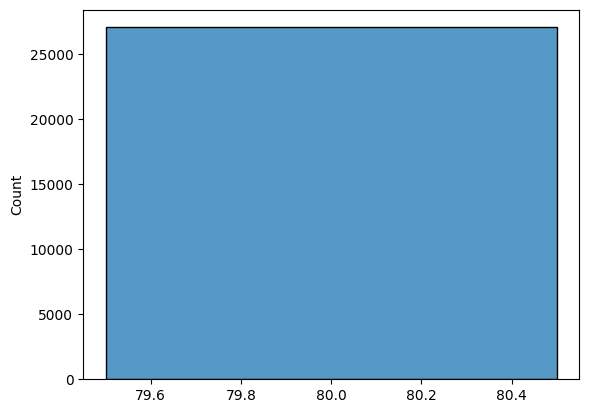

In [44]:
import seaborn as sns

sns.histplot(walk_lens)

In [9]:
walks = torch.Tensor(walks)
walk = walks[0]

ValueError: expected sequence of length 5 at dim 1 (got 10)

In [24]:
x = torch.tensor([[1, 1, 1]])
x.unfold(1, 5, 1)

RuntimeError: maximum size for tensor at dimension 1 is 3 but size is 5

In [20]:
walks = walks.unfold(1, cfg.posenc_Node2Vec.window_size, 1)

tensor([[[1402., 1482., 1973.,  ...,  279., 1195.,  270.],
         [1482., 1973., 1976.,  ..., 1195.,  270., 1215.],
         [1973., 1976.,  502.,  ...,  270., 1215., 1894.],
         ...,
         [ 120.,  483.,  120.,  ...,  490., 2105.,  517.],
         [ 483.,  120.,  816.,  ..., 2105.,  517., 2105.],
         [ 120.,  816.,  483.,  ...,  517., 2105.,  490.]],

        [[1594.,   31., 1594.,  ...,   31., 1594.,   31.],
         [  31., 1594.,   31.,  ..., 1594.,   31., 1594.],
         [1594.,   31., 1594.,  ...,   31., 1594.,   31.],
         ...,
         [1594.,   31., 1594.,  ...,   31., 1594.,   31.],
         [  31., 1594.,   31.,  ..., 1594.,   31., 1594.],
         [1594.,   31., 1594.,  ...,   31., 1594.,   31.]],

        [[2017.,  815.,   55.,  ..., 1156.,  897., 1156.],
         [ 815.,   55.,  771.,  ...,  897., 1156.,   65.],
         [  55.,  771.,   65.,  ..., 1156.,   65.,  771.],
         ...,
         [ 155., 1358., 1752.,  ..., 1750., 1358., 1721.],
         [

In [8]:
len(walks[0]), len(walks[1]), len(walks[2])

(80, 80, 80)

In [9]:
for i in range(len(walks)):
    if len(walks[i]) != 80:
        print(i)

In [58]:
dataset.data

/home/anutkased/dev/Exphormer/exphormer-env/lib/python3.10/site-packages/torch_geometric/data/in_memory_dataset.py:300: UserWarning: It is not recommended to directly access the internal storage format `data` of an 'InMemoryDataset'. If you are absolutely certain what you are doing, access the internal storage via `InMemoryDataset._data` instead to suppress this warning. Alternatively, you can access stacked individual attributes of every graph via `dataset.{attr_name}`.
  warnings.warn(msg)


Data(x=[2708, 1433], edge_index=[2, 10556], y=[2708], train_mask=[2708], val_mask=[2708], test_mask=[2708])

In [59]:
from graphgps.transform.node_to_vec import learn_embeddings

x = learn_embeddings(dataset.data, cfg)

In [60]:
x.shape

torch.Size([2708, 16])

In [61]:
x - x[0, :].reshape(1, -1)

tensor([[ 0.0000,  0.0000,  0.0000,  ...,  0.0000,  0.0000,  0.0000],
        [ 0.0213,  0.0047, -0.0837,  ..., -0.0656, -0.0166,  0.0055],
        [ 0.0630, -0.0472, -0.0465,  ..., -0.0428, -0.0175,  0.0714],
        ...,
        [ 0.0177,  0.0027, -0.0152,  ..., -0.0732,  0.0384,  0.0187],
        [-0.0579,  0.0480, -0.0078,  ..., -0.0047,  0.0400, -0.0072],
        [ 0.0007, -0.0344,  0.0148,  ..., -0.0126,  0.0475,  0.0189]])

In [62]:
import torch

def norm_vecotors(x):
    norms = torch.linalg.vector_norm(x, dim=1)
    i = torch.argmin(norms)
    x_normed = x - x[i, :].reshape(1, -1)
    norms = torch.linalg.vector_norm(x_normed, dim=1)
    j = torch.argmax(norms)
    x_normed /= norms[j]
    return x_normed

In [63]:
normed_x = norm_vecotors(x)

tensor(1.0000)